# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


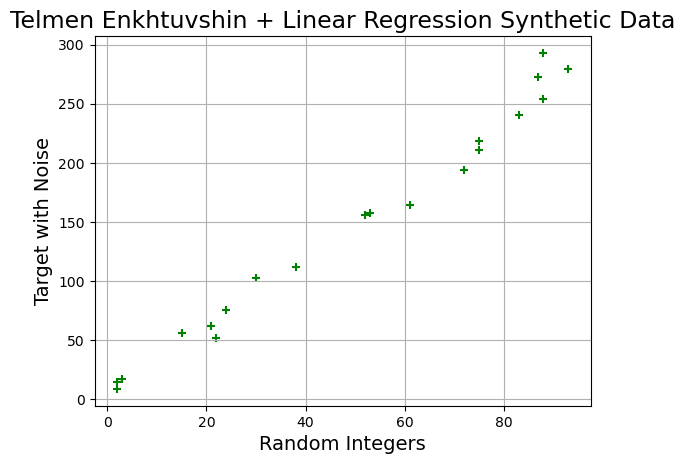

In [35]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid

# Your code
# Special Jupyter command to plot inline
%matplotlib inline
# x-axis label
plt.xlabel('Random Integers', fontsize = 14)
# y-axis label
plt.ylabel('Target with Noise', fontsize = 14)
# Plot title
plt.title('Telmen Enkhtuvshin + Linear Regression Synthetic Data', fontsize = 17);
# Plotting with scatterplot
plt.scatter(X, y, color='green', marker='+')
# Adding grid for easy visualization
plt.grid()
# Displaying plot
plt.show()

#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [36]:
# Your code for linear regression model

# Sklearn model
from sklearn import linear_model

# Prepare data
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)

# Building the Model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Review Model parameter 
print("Coefficient:", reg.coef_)
print("Intercept", reg.intercept_)
print("Predicted value for x=50:", reg.predict([[50]]))

Coefficient: [[2.92415997]]
Intercept [3.13756608]
Predicted value for x=50: [[149.34556448]]


In [38]:
X = np.column_stack((np.ones(len(X)), X))
X, X.shape

(array([[ 1., 52.],
        [ 1., 93.],
        [ 1., 15.],
        [ 1., 72.],
        [ 1., 61.],
        [ 1., 21.],
        [ 1., 83.],
        [ 1., 87.],
        [ 1., 75.],
        [ 1., 75.],
        [ 1., 88.],
        [ 1., 24.],
        [ 1.,  3.],
        [ 1., 22.],
        [ 1., 53.],
        [ 1.,  2.],
        [ 1., 88.],
        [ 1., 30.],
        [ 1., 38.],
        [ 1.,  2.]]),
 (20, 2))

In [39]:
# Your code for linear regression model

# Manually write cost function & gradient descent 

# Reshape X to include a bias term (column of ones for the intercept) by np.column_stack
# your code
# Reshaping X to incliude bias
X = np.column_stack((np.ones(len(X)), X[:, -1]))


# Define the cost function for linear regression
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.
    """
    # your code 
    # Computing cost for linear regression using MSE cost function
    cost = np.sum(np.square(np.dot(X, theta) - y)) / (2 * len(y))
    
    # Returning cost
    return cost
    
   

# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """
    
    theta = np.zeros(2)  # Initialize theta (matching number of features)
    m = len(y)  # Number of training examples

    

    # Iterate to update theta with iterations
    # your code 
    for i in range(iterations):
        # Update theta[0] intercept term using the cost function gradient
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        
        # Update theta[1] coefficient term using the cost function gradient
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        
        # Update theta as a new array with the computed values
        theta = np.array([t0, t1])

    return theta
    


# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.0001

# Call the gradient descent function to compute optimized parameters
theta = gradient_descent(X, y, alpha, iterations)# your code

# Compute the cost using the optimized parameters
cost = compute_cost(X, y, theta)# your code

# Print the results
print("Optimized theta (parameters):", theta)  # Optimized values for theta (intercept and slope)
print("Final cost:", cost)  # Final cost value to evaluate the fit

Optimized theta (parameters): [0.46266464 2.96267244]
Final cost: 69.69441359034006


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

In [40]:
X, theta

(array([[ 1., 52.],
        [ 1., 93.],
        [ 1., 15.],
        [ 1., 72.],
        [ 1., 61.],
        [ 1., 21.],
        [ 1., 83.],
        [ 1., 87.],
        [ 1., 75.],
        [ 1., 75.],
        [ 1., 88.],
        [ 1., 24.],
        [ 1.,  3.],
        [ 1., 22.],
        [ 1., 53.],
        [ 1.,  2.],
        [ 1., 88.],
        [ 1., 30.],
        [ 1., 38.],
        [ 1.,  2.]]),
 array([0.46266464, 2.96267244]))

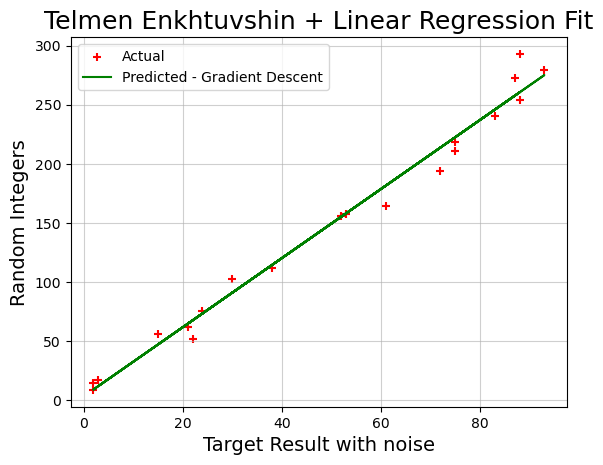

In [50]:
# Compare predictions with actual values
y_pred = np.dot(X, theta)


# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 
# Plotting with scatterplot
plt.scatter(X_train, y_train, color='red', marker='+', label='Actual')
plt.plot(X_train, reg.predict(X_train), color = 'green', label='Predicted - Gradient Descent')
plt.title('Telmen Enkhtuvshin + Linear Regression Fit', fontsize = 18)
plt.xlabel('Target Result with noise', fontsize = 14)
plt.ylabel('Random Integers', fontsize = 14)
plt.grid(alpha=0.6)
plt.legend(loc='best')
plt.show()

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [100]:
import pandas as pd
#read data from Pandas 

# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv('Study_hour_Data.csv')# your code

# Display basic information
print(data.info())
print(data.describe())

#Generate your training data X & y
X =  data[['Hours of Study']].values #use column Hours of Study
y =  data.Passed.values #use columns Passed
X, y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000


(array([[8],
        [8],
        [3],
        [7],
        [7],
        [0],
        [4],
        [2],
        [5],
        [2],
        [2],
        [2],
        [1],
        [0],
        [8],
        [4],
        [0],
        [9],
        [6],
        [2],
        [4],
        [1],
        [5],
        [3],
        [4],
        [4],
        [3],
        [7],
        [1],
        [1],
        [7],
        [7],
        [0],
        [2],
        [9],
        [9],
        [3],
        [2],
        [5],
        [8],
        [1],
        [0],
        [7],
        [6],
        [2],
        [0],
        [8],
        [2],
        [5],
        [1],
        [8],
        [1],
        [5],
        [4],
        [2],
        [8],
        [3],
        [5],
        [0],
        [9],
        [3],
        [6],
        [3],
        [4],
        [7],
        [6],
        [3],
        [9],
        [0],
        [4],
        [4],
        [5],
        [7],
        [6],
        [6],
        [2],
        [4],

In [101]:
data

,Hours of Study,Class Participation,Passed
0,8,0.486891,1
1,8,0.309590,1
2,3,0.577441,1
3,7,0.441708,1
4,7,0.359678,1
...,...,...,...
195,6,0.798745,1
196,5,0.635088,1
197,2,0.229969,0
198,0,0.051207,0


#### **Section 2: Visualize the data**

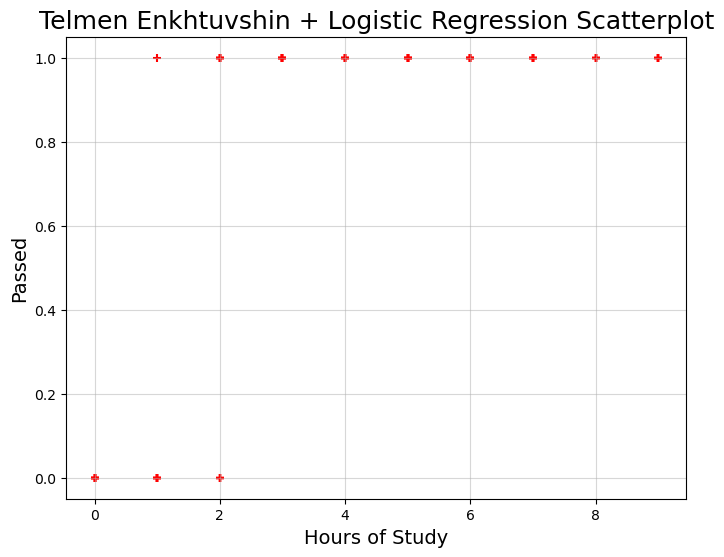

In [102]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 
plt.figure(figsize=(8, 6))
plt.scatter(X, y, marker='+', color='red')
plt.ylabel('Passed', fontsize=14)
plt.xlabel('Hours of Study', fontsize=14)
plt.title('Telmen Enkhtuvshin + Logistic Regression Scatterplot', fontsize=18)
plt.grid(alpha=0.5)
plt.show()


#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [103]:
# Unchanged X values
X

array([[8],
       [8],
       [3],
       [7],
       [7],
       [0],
       [4],
       [2],
       [5],
       [2],
       [2],
       [2],
       [1],
       [0],
       [8],
       [4],
       [0],
       [9],
       [6],
       [2],
       [4],
       [1],
       [5],
       [3],
       [4],
       [4],
       [3],
       [7],
       [1],
       [1],
       [7],
       [7],
       [0],
       [2],
       [9],
       [9],
       [3],
       [2],
       [5],
       [8],
       [1],
       [0],
       [7],
       [6],
       [2],
       [0],
       [8],
       [2],
       [5],
       [1],
       [8],
       [1],
       [5],
       [4],
       [2],
       [8],
       [3],
       [5],
       [0],
       [9],
       [3],
       [6],
       [3],
       [4],
       [7],
       [6],
       [3],
       [9],
       [0],
       [4],
       [4],
       [5],
       [7],
       [6],
       [6],
       [2],
       [4],
       [2],
       [7],
       [1],
       [6],
       [6],
       [0],
    

In [105]:
# Your code for logistic regression model

# Sklearn model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

# Building the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Review Model parameter 
y_predicted = model.predict(X_test)
print(X_test)
print(y_predicted)
print(model.score(X_test,y_test))
print(model.coef_)
print(model.intercept_)


[[9]
 [9]
 [1]
 [1]
 [5]
 [2]
 [0]
 [8]
 [5]
 [6]
 [0]
 [3]
 [2]
 [2]
 [2]
 [2]
 [0]
 [4]
 [0]
 [3]
 [3]
 [6]
 [4]
 [1]
 [0]
 [9]
 [0]
 [3]
 [7]
 [8]
 [5]
 [5]
 [5]
 [0]
 [7]
 [8]
 [5]
 [0]
 [3]
 [5]]
[1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1]
1.0
[[2.4040383]]
[-4.49270418]


In [111]:
# Your logistic regression model

# Define the sigmoid function
def sigmoid(z):
    # pass
    return 1 / (1 + np.exp(-z))
     

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    # pass 
    # Number of training examples
    m = len(y)
    
    # Compute the predicted probabilities using the sigmoid function
    h = sigmoid(X @ theta)
    
    # Compute the cost function for logistic regression
    cost = -(1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
    
    #Return cost
    return cost
    

# Define the gradient function
def gradient(theta, X, y):
    #pass
    # Number of training examples
    m = len(y)
    # Predicted probabilities usign the sigmoid function
    h = sigmoid(X @ theta)
    # Compute the gradient vector
    gradient = (1 / m) * X.T.dot(h - y)
    
    # Return final gradient
    return gradient
    
    

In [112]:
from scipy.optimize import minimize
# Train your model
    
# Add a bias term (intercept) to X 
X_bias = np.column_stack((np.ones(len(X)), X))
    
# Initialize theta (parameters) to zeros
theta = np.zeros(X_bias.shape[1])

# Minimize the cost function using scipy.optimize
theta = minimize(fun=cost_function, x0=theta, args=(X_bias, y), method='TNC', jac=gradient, options = {'maxfun': 4000})

optimal_theta = theta.x

# Print the optimized parameters (theta)
print("Optimized theta (parameters):", optimal_theta)

Optimized theta (parameters): [-7.1171074   3.89184235]


In [113]:
# Changed matrix X with bias
X_bias

array([[1., 8.],
       [1., 8.],
       [1., 3.],
       [1., 7.],
       [1., 7.],
       [1., 0.],
       [1., 4.],
       [1., 2.],
       [1., 5.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 1.],
       [1., 0.],
       [1., 8.],
       [1., 4.],
       [1., 0.],
       [1., 9.],
       [1., 6.],
       [1., 2.],
       [1., 4.],
       [1., 1.],
       [1., 5.],
       [1., 3.],
       [1., 4.],
       [1., 4.],
       [1., 3.],
       [1., 7.],
       [1., 1.],
       [1., 1.],
       [1., 7.],
       [1., 7.],
       [1., 0.],
       [1., 2.],
       [1., 9.],
       [1., 9.],
       [1., 3.],
       [1., 2.],
       [1., 5.],
       [1., 8.],
       [1., 1.],
       [1., 0.],
       [1., 7.],
       [1., 6.],
       [1., 2.],
       [1., 0.],
       [1., 8.],
       [1., 2.],
       [1., 5.],
       [1., 1.],
       [1., 8.],
       [1., 1.],
       [1., 5.],
       [1., 4.],
       [1., 2.],
       [1., 8.],
       [1., 3.],
       [1., 5.],
       [1., 0.

#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [116]:
# Predict function
def predict(X, theta):
    # your code
    probs = sigmoid(X.dot(theta))
    return (probs >= 0.5).astype(int)

# Make predictions
# Preparing test data
X_test_C = np.column_stack((np.ones(len(X_test)), X_test))
# Making predictions on the test set
predictions = predict(X_test_C, optimal_theta) # your code
predictions

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [117]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100 # your code 
print("Accuracy:", accuracy, "%")

Accuracy: 100.0 %


### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

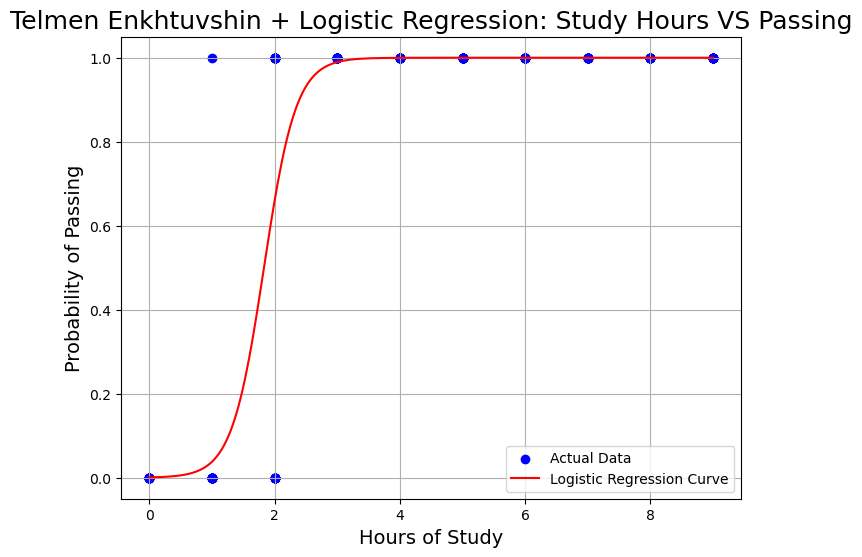

In [118]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Visualize the logistic regression fit
plt.figure(figsize=(8, 6))

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Data')

# Logistic regression curve
hrStudy_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

X_range = np.column_stack((np.ones(len(hrStudy_range)), hrStudy_range))

probabilities = sigmoid(X_range.dot(optimal_theta))

plt.plot(hrStudy_range, probabilities, color='red', label='Logistic Regression Curve')

# Customize the plot
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Probability of Passing', fontsize=14)
plt.title('Telmen Enkhtuvshin + Logistic Regression: Study Hours VS Passing', fontsize=18)
plt.legend(loc='best')
plt.grid()
plt.show()